In [1]:
# Import main library dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
#import data set
import pandas as pd
df = pd.read_csv('data/flapping_fin_data.csv')
df

,percentage_ac,flapfreq,Thrust_N
0,100,2.750000,15.461806
1,100,1.625000,0.878331
2,100,3.875000,25.876845
3,100,1.062500,0.257417
4,100,3.312500,22.518060
...,...,...,...
135,80,0.640625,-0.202555
136,80,2.890625,15.360836
137,80,1.765625,1.708283
138,80,4.015625,15.456489


In [3]:
#Check null values
df.isnull().sum()

percentage_ac    0
flapfreq         0
Thrust_N         0
dtype: int64

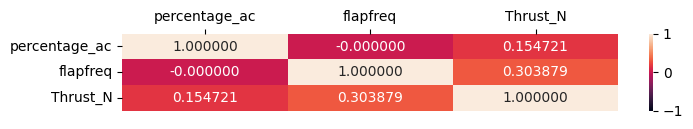

In [4]:
# Plot correlation heatmap
plt.figure(figsize=(8, 1))

# print(df.corr(method="pearson").to_latex)
sns.heatmap(df.corr(method="pearson"), annot=True, vmin=-1, vmax=1, fmt=".6f")

# Change the y-axis rotation
plt.yticks(rotation=0)

# Place x-axis on top
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Change the x-tick values
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

# CHange the y-tick values
plt.yticks(np.arange(0.5, len(df.columns), 1), df.columns)

# Export to svg & png
plt.savefig("./laporan/graph/case1_corr_heatmap.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_corr_heatmap.png", format = 'png', dpi=300, bbox_inches = 'tight')

# Show the plot
plt.show()

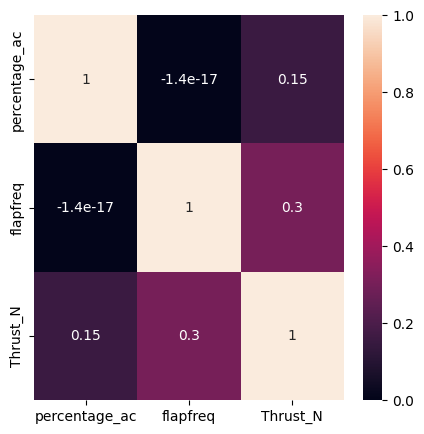

In [5]:
# Check correlation
corr_matrix = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True)


plt.show()

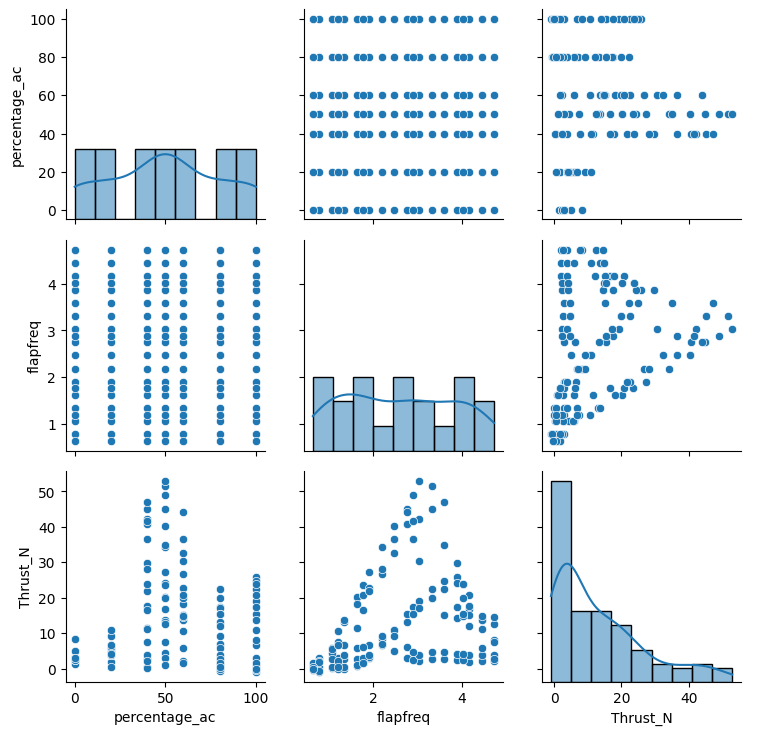

In [6]:
# Use PairGrid to visualize each column relation with others
g = sns.PairGrid(df)
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.savefig("./laporan/graph/case1_data_dist.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_data_dist.png", format = 'png', dpi=300, bbox_inches = 'tight')

In [7]:
#Define the training features (input variables)
X = df.drop(columns = 'Thrust_N')
X

,percentage_ac,flapfreq
0,100,2.750000
1,100,1.625000
2,100,3.875000
3,100,1.062500
4,100,3.312500
...,...,...
135,80,0.640625
136,80,2.890625
137,80,1.765625
138,80,4.015625


In [8]:
#Define label (output variables)
y = df['Thrust_N']

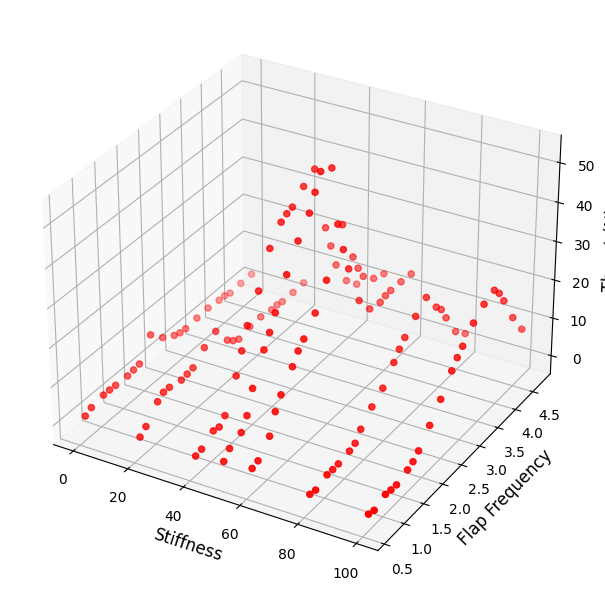

In [9]:
# Create 3D plot
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
sample_scatter = ax.scatter(df['percentage_ac'], df['flapfreq'], df['Thrust_N'], c='red')

# Set the labels
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flap Frequency')
ax.set_zlabel('Thrust (N)')

# Enable rotation and interaction
# ax.view_init(azim=120)

# Set the title
# ax.set_title('Sample Scatter Plot')

# Change font size of title and others
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
ax.zaxis.label.set_fontsize(12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Export to png
plt.savefig("./laporan/graph/case1_3d_scatter.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_3d_scatter.png", format = 'png', dpi=300, bbox_inches = 'tight')

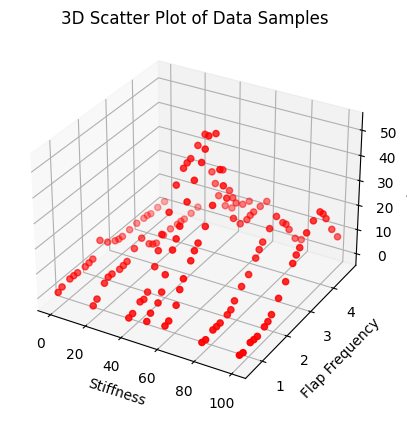

In [10]:
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['percentage_ac'], df['flapfreq'], y, c='r', marker='o')

# Set labels and title
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flap Frequency')
ax.set_zlabel('Thrust')
ax.set_title('3D Scatter Plot of Data Samples')

# Show the plot
plt.show()

In [11]:
#Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression Model

In [12]:
import numpy as np
import scipy as sp
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to for linear regression
class LinearRegression(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        # Calculate number of data points
        self.training_n_ = X.shape[0]

        # Calculate number of variables
        self.p_ = X.shape[1]

        # Compute F by concaneating a column of ones to X
        F = np.c_[np.ones(self.training_n_), X]

        # Compute the estimation of coefficients
        self.beta_ = np.linalg.inv(F.T @ F) @ F.T @ y

        # Separate intercept and coefficient
        self.intercept_ = self.beta_[0]
        self.coef_ = self.beta_[1:]

        # Compute the RSS of beta
        self.RSS_ = np.sum((y - F @ self.beta_)**2)

        # Compute the RSE of beta
        self.RSE_ = np.sqrt(self.RSS_ / (self.training_n_ - self.p_ - 1))

        # Compute the estimation of variance of the model
        self.var_ = self.RSS_ / (self.training_n_ - self.p_ - 1)

        # Compute the estimation of variance of the coefficients
        self.beta_var_ = (self.var_ * np.linalg.inv(F.T @ F)).diagonal()
    
    def predict(self, X):
        # Calculate number of data points
        n = X.shape[0]

        # Compute F
        F = np.c_[np.ones(n), X]

        # Compute the prediction
        y_pred = F @ self.beta_

        return y_pred
    
    def evaluation_report(self, alpha=0.05):
        # Calculate standard error
        beta_se_ = np.sqrt(self.beta_var_)

        # Calculate t-statistic
        t_stat_ = self.beta_ / beta_se_

        # Calculate degree of freedom
        df_ = self.training_n_ - self.p_

        # Calculate p-value
        p_value_ = sp.stats.t.sf(np.abs(t_stat_), df_) * 2

        # Determine hypothesis test result
        hypothesis_test_result_ = np.where(p_value_ < alpha, 'Reject H0', 'Do Not Reject H0')

        # Create a dataframe to store the result
        result = pd.DataFrame({
            "Beta": self.beta_,
            "Standard Error": beta_se_,
            "t-statistic": t_stat_,
            "p-value": p_value_,
            "Hypothesis Test Result": hypothesis_test_result_
        })

        return result

In [13]:
lr = LinearRegression()

In [14]:
#Speed training data to the linear regression model
lr.fit(X_train, y_train)

In [15]:
lr.evaluation_report()

,Beta,Standard Error,t-statistic,p-value,Hypothesis Test Result
0,2.685464,3.355178,0.800394,0.425208,Do Not Reject H0
1,0.048543,0.039070,1.242471,0.216705,Do Not Reject H0
2,3.225045,0.977165,3.300410,0.001302,Reject H0


In [16]:
print(lr.evaluation_report().to_latex(index=True))

\begin{tabular}{lrrrrl}
\toprule
{} &      Beta &  Standard Error &  t-statistic &   p-value & Hypothesis Test Result \\
\midrule
0 &  2.685464 &        3.355178 &     0.800394 &  0.425208 &       Do Not Reject H0 \\
1 &  0.048543 &        0.039070 &     1.242471 &  0.216705 &       Do Not Reject H0 \\
2 &  3.225045 &        0.977165 &     3.300410 &  0.001302 &              Reject H0 \\
\bottomrule
\end{tabular}



C:\Users\hafiz\AppData\Local\Temp\ipykernel_5448\4003643884.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(lr.evaluation_report().to_latex(index=True))


In [17]:
#The intercept parameter
beta_0 = lr.intercept_
beta_0

2.6854635408597636

In [18]:
#The coefficient parameters
beta = lr.coef_
beta

array([0.04854327, 3.22504483])

## Model Training

In [19]:
#Predict the thrust using the training set
y_pred_train = lr.predict(X_train)
y_pred_train

array([20.49036101, 20.94388294, 14.43502217,  8.53923709,  9.80407061,
       14.8885441 ,  6.17589518,  8.0538044 , 14.46693292, 17.96746534,
       10.77493598, 18.54863028, 15.79558795, 16.08955612, 18.09510835,
       11.80962285, 18.8745092 , 13.55988906,  6.69323862, 15.31015527,
       21.7871053 , 15.50161979, 20.33080725, 19.84537456, 15.43779829,
       16.60689955,  9.60583471, 15.37397678, 13.98150024, 10.83875749,
       18.93833071, 19.90919607, 10.9664005 , 16.70263181, 15.24633377,
       12.97872412, 21.8509268 , 17.251886  , 19.12979523, 11.68197984,
       15.89132022,  9.08849128, 20.88006144, 11.87344436, 12.5890237 ,
       17.57776492, 10.3533248 , 12.52520219, 12.78048822, 13.94958948,
       12.71666671, 17.60967567, 18.22275137, 11.61815833, 13.23401015,
       15.63603419, 14.59457593, 13.07445638, 14.53075443, 13.43224605,
       16.40866365, 17.90364383, 12.46138068,  7.1786713 ,  7.66410398,
        4.75150789,  6.11207367, 20.81623993,  7.01911753,  8.89

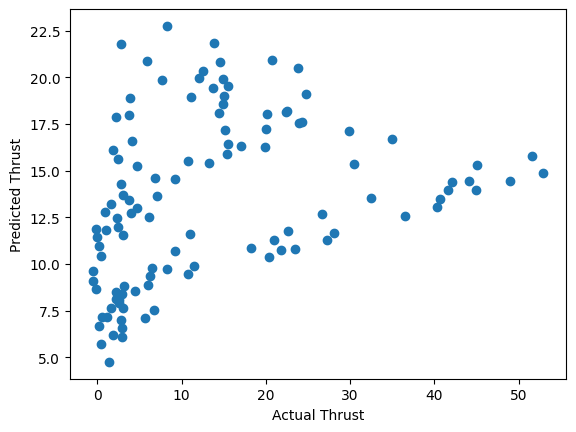

In [20]:
#Check how good the prediction
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Thrust')
plt.ylabel('Predicted Thrust')
plt.show()

In [21]:
#Evaluating R2 scores values to know how much good the prediction
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train) 

0.10622697355430422

R2 scores shows how close the data have fitted to the regression line or the portion of the variance or a dependent variables that means the thrust can be explained by the independent variables in the regression model, and the independent variables are our training features

What portion of the variance in the thrust can be explained by our training features 

R2 scores can be from 0 to 1. If the R2 scores is closer to 1 that means model is better, if the R2 scores is closer to 0 that means model is bad. We can conclude that our model is bad

In [22]:
#Evaluate RSE
import numpy as np
def calculate_rse(y_train, y_pred_train):
    
    def calculate_rss(y_train, y_pred_train):
        residuals = y_train - y_pred_train
        rss = np.sum(residuals**2)
        return rss
    
    n = len(y_train)
    p = X.shape[1]
    rse = np.sqrt((1/(n-p-1))*calculate_rss(y_train, y_pred_train))
    return rse

    

rse = calculate_rse(y_train, y_pred_train)
print("RSE:", rse)


RSE: 12.910841959924014


In [23]:
lr.RSE_

12.910841959924014

## Model Testing

In [24]:
#Use testing data to build the model
y_pred_test = lr.predict(X_test)

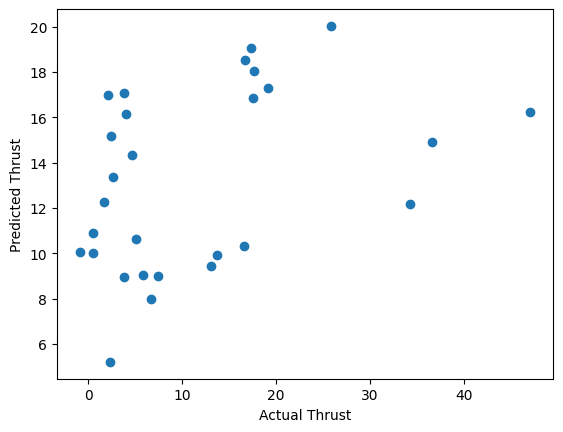

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Thrust')
plt.ylabel('Predicted Thrust')
plt.show()

In [26]:
#Check the R2 score
r2_score(y_test, y_pred_test)

0.13925053915720886

The testing data worked better but it's just close, we had only 20% data for the testing purpose, so less data less error then we got better R2 scores

In [27]:
#Evaluate the RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE : " + str(mean_squared_error(y_pred_test, y_test, squared=False)))
print("MAE : " + str(mean_absolute_error(y_pred_test, y_test)))

RMSE : 11.102669521747032
MAE : 8.399191988944938


## 3D Plot

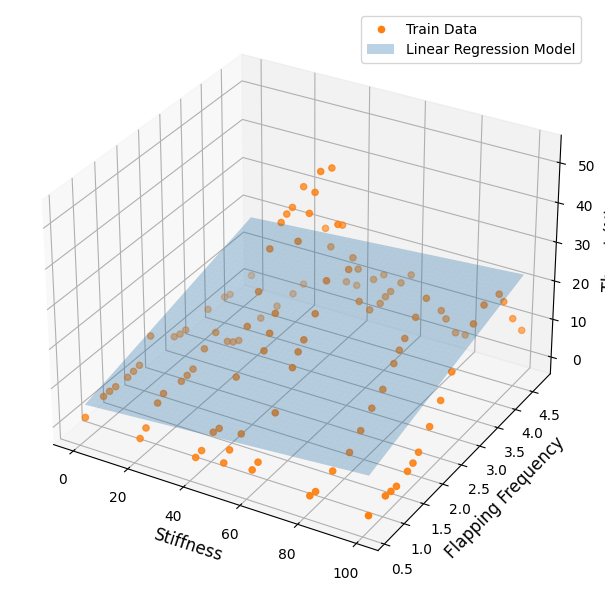

In [28]:
# Plot the result
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111, projection='3d')

# Plot the samples with scatter plot
X1 = X_train['percentage_ac']
X2 = X_train['flapfreq']
samples_scatter = ax.scatter(X1, X2, y_train, label='Train Data', c='tab:orange')

# Create linear space, meshgrid, and vectors
X1_range = np.linspace(X['percentage_ac'].min(), X['percentage_ac'].max(), 100)
X2_range = np.linspace(X['flapfreq'].min(), X['flapfreq'].max(), 100)

X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

X1_vec = X1_mesh.reshape(-1,)
X2_vec = X2_mesh.reshape(-1,)

X_vec = np.array([X1_vec, X2_vec]).T
y_vec_lr = lr.predict(X_vec)
y_mesh_lr = y_vec_lr.reshape(X1_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, y_mesh_lr, alpha=0.3, label='Linear Regression Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flapping Frequency')
ax.set_zlabel('Thrust (N)')
# ax.set_title('Linear Regression Model on The Training Data')

# Change label font
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
ax.zaxis.label.set_fontsize(12)

# Show legend
ax.legend()

# Export to png and svg
plt.savefig("./laporan/graph/case1_lr_plane.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_lr_plane.png", format = 'png', dpi=300, bbox_inches = 'tight')

plt.show()

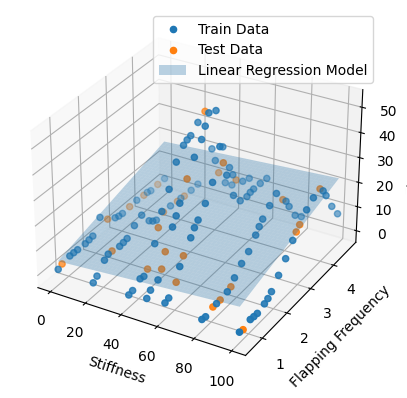

In [29]:
import numpy as np

# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the training data with scater plot
X1_train = X_train['percentage_ac']
X2_train = X_train['flapfreq']
train_scatter = ax.scatter(X1_train, X2_train, y_train, label='Train Data')

# Plot the test data with scater plot
X1_test = X_test['percentage_ac']
X2_test = X_test['flapfreq']
test_scatter = ax.scatter(X1_test, X2_test, y_test, label='Test Data')

# # Plot the samples with scatter plot with tab:orange color
# X1 = X['percentage_ac']
# X2 = X['flapfreq']
# samples_scatter = ax.scatter(X1, X2, y, label='Samples', color='tab:orange')

# Create linear space, meshgrid, and vectos
X1_range = np.linspace(X['percentage_ac'].min(), X['percentage_ac'].max(), 100)
X2_range = np.linspace(X['flapfreq'].min(), X['flapfreq'].max(), 100)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
X1_vec = X1_mesh.reshape(-1,)
X2_vec = X2_mesh.reshape(-1,)
X_vec = np.array([X1_vec, X2_vec]).T
y_vec_lr = lr.predict(X_vec)
y_mesh_lr = y_vec_lr.reshape(X1_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, y_mesh_lr, alpha=0.3, label='Linear Regression Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flapping Frequency')
ax.set_zlabel('Thrust (N)')

# Show legend
ax.legend()

ax.view_init()

plt.show()

# KNN Regression Model

In [30]:
#import library needed
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


In [31]:
#import data set
import pandas as pd
df = pd.read_csv('data/flapping_fin_data.csv')

#Define the training features (input variables) and label
X = df.drop(columns = 'Thrust_N')
y = y = df['Thrust_N']

#Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Hyperparameter with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Create the model
knnr_h = KNeighborsRegressor()

# Create the parameter grid
param_grid = {
    'n_neighbors': [k for k in range(1, 21)],
    # 'weights': ['uniform', 'distance'],
    # 'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the grid search
grid = GridSearchCV(knnr_h, param_grid, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the grid search
grid.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:")
print(f"{grid.best_params_}")

# Store iterations of grid cv
grid_cv_result = pd.DataFrame(grid.cv_results_)

Best Parameters:
{'n_neighbors': 2}


In [34]:
grid_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002452,0.000652,0.002603,0.001024,1,{'n_neighbors': 1},-5.360415,-4.064224,-5.574116,-4.222060,-2.426506,-2.449754,-2.511341,-3.750316,-3.820462,-1.516977,-3.569617,1.260355,4
1,0.002201,0.000977,0.001738,0.000754,2,{'n_neighbors': 2},-4.563204,-3.442693,-1.516258,-1.833841,-2.363901,-2.172665,-2.994277,-3.703011,-3.729768,-1.820716,-2.814034,0.967564,1
2,0.001302,0.000462,0.001702,0.001005,3,{'n_neighbors': 3},-3.891963,-5.947369,-3.906688,-2.880211,-2.358674,-2.054073,-3.697572,-5.001899,-3.630771,-1.230585,-3.459980,1.324091,2
3,0.001600,0.000663,0.001700,0.001005,4,{'n_neighbors': 4},-4.769392,-5.663459,-4.325818,-3.356069,-1.971700,-1.986552,-2.599104,-6.036419,-3.230339,-1.606937,-3.554579,1.499749,3
4,0.001401,0.000661,0.001702,0.000781,5,{'n_neighbors': 5},-5.098502,-5.728519,-4.947805,-3.495838,-2.480371,-3.303613,-2.273815,-5.552417,-3.598926,-1.832759,-3.831256,1.345511,5
5,0.001702,0.000459,0.001839,0.000716,6,{'n_neighbors': 6},-5.688257,-6.899932,-5.433132,-3.265992,-2.253499,-2.947965,-2.549387,-4.611466,-5.043084,-2.114785,-4.080750,1.583178,6
6,0.002311,0.000973,0.002103,0.001133,7,{'n_neighbors': 7},-5.819979,-7.124602,-5.309356,-3.973319,-2.603437,-4.194935,-2.322209,-5.306931,-4.331191,-1.876543,-4.286250,1.584342,7
7,0.003103,0.001443,0.003198,0.002039,8,{'n_neighbors': 8},-6.148885,-7.642728,-5.247527,-4.288929,-2.914788,-4.219893,-2.786630,-5.748565,-4.215876,-2.307649,-4.552147,1.585710,8
8,0.002599,0.001280,0.002742,0.001303,9,{'n_neighbors': 9},-6.470719,-7.450087,-5.253044,-4.996675,-3.772024,-3.871307,-3.115819,-5.345748,-4.330343,-2.246251,-4.685202,1.473843,9
9,0.001804,0.000983,0.002458,0.001284,10,{'n_neighbors': 10},-6.775802,-7.483859,-4.697686,-4.913242,-3.865734,-4.860512,-3.782567,-5.830896,-4.714506,-2.298468,-4.922327,1.421969,10


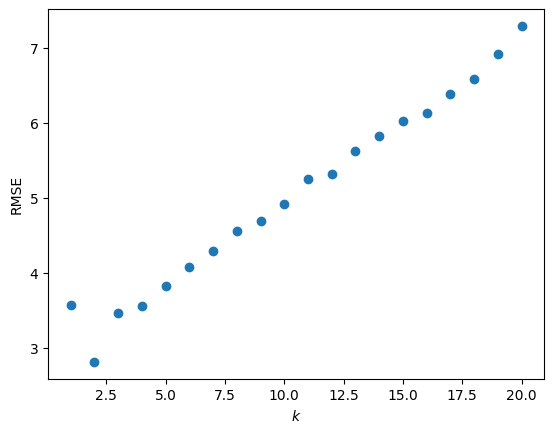

In [35]:
grid_cv_result["mean_test_score"] = -grid_cv_result["mean_test_score"]
plt.scatter(grid_cv_result["param_n_neighbors"], grid_cv_result["mean_test_score"])
# Set the label
plt.xlabel('$k$')
plt.ylabel('RMSE')

# Export to png and svg
plt.savefig("./laporan/graph/case1_knn_rmse.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_knn_rmse.png", format = 'png', dpi=300, bbox_inches = 'tight')

In [36]:
# Use KNN model
# knn = KNeighborsRegressor(n_neighbors=2)
knn = KNeighborsRegressor(**grid.best_params_)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

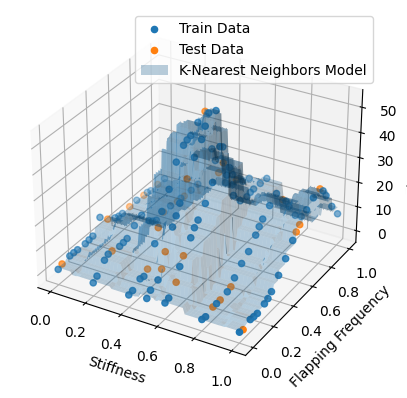

In [37]:
# Plot the result
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scaled training data with scater plot
X1_train_scaled = X_train_scaled[:,0]
X2_train_scaled = X_train_scaled[:,1]
train_scatter_scaled = ax.scatter(X1_train_scaled, X2_train_scaled, y_train, label='Train Data')

# Plot the scaled test data with scater plot
X1_test_scaled = X_test_scaled[:,0]
X2_test_scaled = X_test_scaled[:,1]
test_scatter_scaled = ax.scatter(X1_test_scaled, X2_test_scaled, y_test, label='Test Data')

# Create linear space, meshgrid, and vectos
X1_scaled_range = np.linspace(0, 1, 100)
X2_scaled_range = np.linspace(0, 1, 100)
X1_scaled_mesh, X2_scaled_mesh = np.meshgrid(X1_scaled_range, X2_scaled_range)
X1_scaled_vec = X1_scaled_mesh.reshape(-1,)
X2_scaled_vec = X2_scaled_mesh.reshape(-1,)
X_scaled_vec = np.array([X1_scaled_vec, X2_scaled_vec]).T
y_vec_knn = knn.predict(X_scaled_vec)
y_mesh_knn = y_vec_knn.reshape(X1_scaled_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_scaled_mesh, X2_scaled_mesh, y_mesh_knn, alpha=0.3, label='K-Nearest Neighbors Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flapping Frequency')
ax.set_zlabel('Thrust (N)')

# Show legend
ax.legend()

ax.view_init()

plt.show()

c:\Users\hafiz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


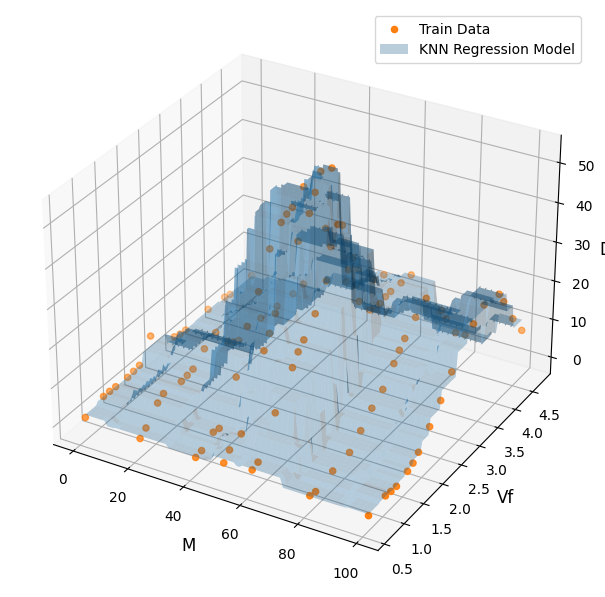

In [38]:
# Plot the result
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data with scater plot
# X1_train = X_train['M']
# X2_train = X_train['Vf']
# train_scatter = ax.scatter(X1_train, X2_train, y_train, label='Train Data')

# Plot the test data with scater plot
# X1_test = X_test['M']
# X2_test = X_test['Vf']
# test_scatter = ax.scatter(X1_test, X2_test, y_test, label='Test Data')

# Plot the samples with scatter plot
X1 = X_train['percentage_ac']
X2 = X_train['flapfreq']
samples_scatter = ax.scatter(X1, X2, y_train, label='Train Data', c='tab:orange')

# Create linear space, meshgrid, and vectors
X1_range = np.linspace(X['percentage_ac'].min(), X['percentage_ac'].max(), 100)
X2_range = np.linspace(X['flapfreq'].min(), X['flapfreq'].max(), 100)

X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

X1_vec = X1_mesh.reshape(-1,)
X2_vec = X2_mesh.reshape(-1,)

X_vec = np.array([X1_vec, X2_vec]).T
X_vec_scaled = scaler.transform(X_vec)
y_vec_knnr = knn.predict(X_vec_scaled)
y_mesh_knnr = y_vec_knnr.reshape(X1_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, y_mesh_knnr, alpha=0.3, label='KNN Regression Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('M')
ax.set_ylabel('Vf')
ax.set_zlabel('DC')
# ax.set_title('KNN Regression Model on The Training Data')

# Change label font
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
ax.zaxis.label.set_fontsize(12)

# Show legend
ax.legend()

# ax.view_init(azim=120)

# Export to png and svg
plt.savefig("./laporan/graph/case1_knnr_plane.svg", format = 'svg', dpi=300, bbox_inches = 'tight')
plt.savefig("./laporan/graph/case1_knnr_plane.png", format = 'png', dpi=300, bbox_inches = 'tight')

plt.show()

In [39]:
#Evaluate the RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE : " + str(mean_squared_error(y_pred_knn, y_test, squared=False)))
print("MAE : " + str(mean_absolute_error(y_pred_knn, y_test)))

RMSE : 2.3082391615672075
MAE : 1.1829739623214286


Our goal is always to reduce the value of MSE and MAE, so we can conclude that our model is actually pretty good

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6c15a45-8d06-4acb-ae55-e8dab1b7dec4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>